In [1]:
### aasignment of text minning emotion minning ### on reviews 

In [3]:
import pandas as pd
import numpy as np 
from matplotlib.pyplot import imread
import spacy
import string
from matplotlib import pyplot as plt 
import afinn
from wordcloud import wordcloud
import nltk
%matplotlib inline 

In [4]:
data = pd.read_csv("flipkart _customer_reviews.csv")

In [5]:
data.describe()

,rating
count,9936.000000
mean,4.229569
std,1.148087
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [5]:
data1=data.rename(columns={"review.text":'review'})

In [6]:
data1

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5
...,...,...
9931,Everything of this headset is well good such a...,4
9932,Good qualityREAD MORE,5
9933,"Amazing Bass, Good sound quality, little bit h...",5
9934,Awesome just loved itREAD MORE,5


In [7]:
data1.shape

(9936, 2)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9936 entries, 0 to 9935
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9936 non-null   object
 1   rating  9936 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 155.4+ KB


In [9]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [10]:
book=pd.DataFrame(data1.review)

In [11]:
book

,review
0,It was nice produt. I like it's design a lot. ...
1,awesome sound....very pretty to see this nd th...
2,awesome sound quality. pros 7-8 hrs of battery...
3,I think it is such a good product not only as ...
4,Awsome sound powerful bass battery backup is a...
...,...
9931,Everything of this headset is well good such a...
9932,Good qualityREAD MORE
9933,"Amazing Bass, Good sound quality, little bit h..."
9934,Awesome just loved itREAD MORE


In [12]:
#emotion minning
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1') 
 

In [13]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [15]:
book = [review.strip() for review in book.review] # remove both the leading and the trailing characters
book = [review for review in book if review] # removes empty strings, because they are considered in Python as False 

In [16]:
### tokenization 
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[:45]

['It was nice produt.',
 "I like it's design a lot.",
 "It's easy to carry.",
 'And.',
 'Looked stylish.READ MORE awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality.',
 'pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output.',
 'Bass and treble are really very clear without equaliser.',
 'With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention.',
 'Really expecting other leading brands to implement this.ConsVery tight in ears.',
 'adjusters are ok .. this ll be very tight...READ MORE I think it is such a good product not only as per the quality but also the design is quite good .',
 'I m using this product from January ...',
 'In this pandamic situation it has became the most useful and helpful .',
 "Overall th

In [17]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,It was nice produt.
1,I like it's design a lot.
2,It's easy to carry.
3,And.
4,Looked stylish.READ MORE awesome sound....very...
...,...
5187,"In one word i would say ""awesome"".READ MORE It..."
5188,Don't use for call)Full blast headphones.........
5189,I suggest you to buy..
5190,If u r look for best headphones with 8hrs back...


In [18]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [19]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [21]:
# test that it works
calculate_sentiment(text = 'good') 

3

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     4
1     6
2     4
3     1
4    30
5    14
6     9
7    33
8    11
9    32
Name: word_count, dtype: int64

In [24]:
sent_df 

,sentence,sentiment_value,word_count
0,It was nice produt.,3,4
1,I like it's design a lot.,2,6
2,It's easy to carry.,1,4
3,And.,0,1
4,Looked stylish.READ MORE awesome sound....very...,16,30
...,...,...,...
5187,"In one word i would say ""awesome"".READ MORE It...",18,51
5188,Don't use for call)Full blast headphones.........,7,41
5189,I suggest you to buy..,0,5
5190,If u r look for best headphones with 8hrs back...,47,214


In [25]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
2664,It's cancel a decent amount of outside noise.R...,-10,94
4285,It is too tight... and my ears started paining...,-8,44
3578,"But 2major problem, while using headphone 🎧 my...",-7,20
3337,Simply waste.READ MORE It is a very bad produc...,-7,86
3580,"But 2major problem, while using headphone 🎧 my...",-7,20
...,...,...,...
4632,Just buy it fast don't waste time .😃😃😃😃😃😃READ ...,109,387
3163,Good base.Definitely not a good option for tak...,113,380
4842,THE product is too good And i am enjoying the ...,114,377
3102,I’m not happy with this productREAD MORE I thi...,119,412


In [26]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    5192.000000
mean        7.438945
std        12.890098
min       -10.000000
25%         0.000000
50%         3.000000
75%         9.000000
max       195.000000
Name: sentiment_value, dtype: float64

In [27]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
3,And.,0,1
5,pros 7-8 hrs of battery life (including 45 min...,0,14
8,Really expecting other leading brands to imple...,0,11
10,I m using this product from January ...,0,8
16,Sound quality and build quality is awesome2.,0,7
...,...,...,...
5168,But that doesn't count much for me.,0,7
5169,Totally recommendedREAD MORE Exceptional sound...,0,6
5172,Compact design only has one flaw.,0,6
5180,If battery not charged than you play music wit...,0,10


In [28]:
sent_df[sent_df['sentiment_value']>=10]

,sentence,sentiment_value,word_count
4,Looked stylish.READ MORE awesome sound....very...,16,30
12,Overall the bass and the sound quality is pret...,23,104
13,Thanks boat for making such a nice product kee...,12,37
30,"Sometimes, they become uncomforta...READ MORE ...",17,79
31,sound quality is excellent n base is awesome.....,26,85
...,...,...,...
5184,It is very useful when charging it lights red ...,31,168
5185,The sound quality is decent and doesn't hurt e...,13,45
5187,"In one word i would say ""awesome"".READ MORE It...",18,51
5190,If u r look for best headphones with 8hrs back...,47,214


In [29]:
sent_df['index']=range(0,len(sent_df)) 

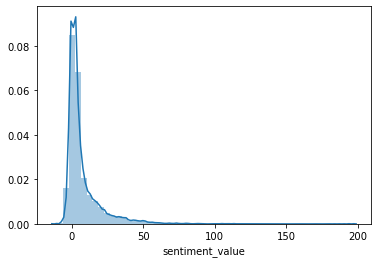

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

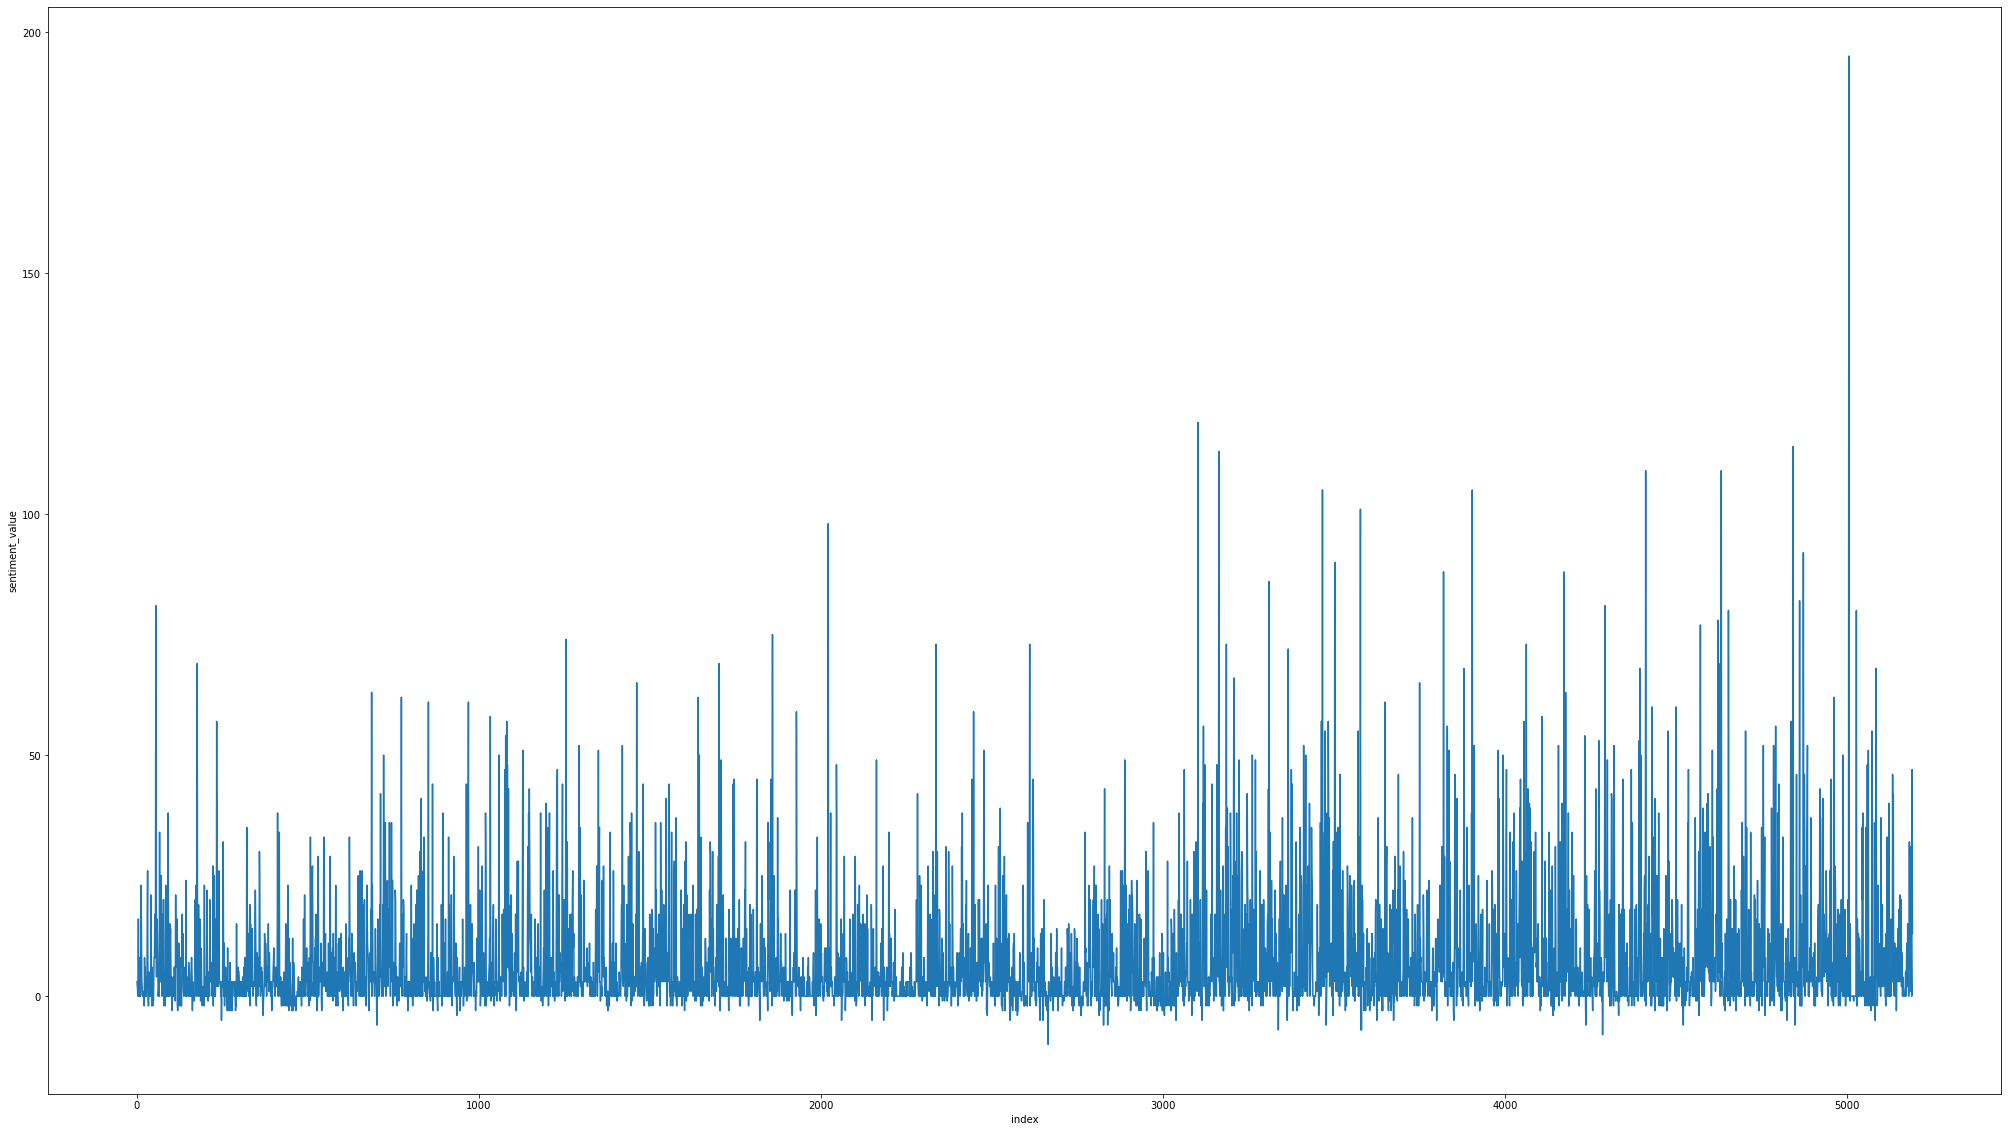

In [31]:
plt.figure(figsize=(35, 20))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

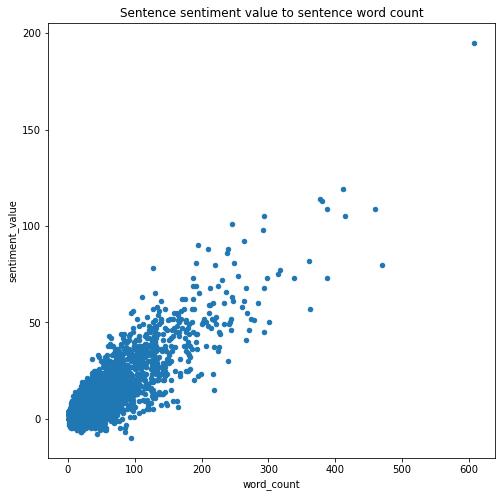

In [32]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [79]:
#### TEXT PROCESSING AND FEATURE EXTRACTION ### 

In [33]:
# Joining the list into one string/text
text = ' '.join(book)
text 

'It was nice produt. I like it\'s design a lot.  It\'s easy to carry. And.   Looked stylish.READ MORE awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is pretty good 

In [34]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'It was nice produt I like its design a lot  Its easy to carry And   Looked stylishREAD MORE awesome soundvery pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality pros 78 hrs of battery life including 45 mins approx call timeAwesome sound output Bass and treble are really very clear without equaliser With equaliser sound wary depends on the handset sound qualityWeightless to carry and in head tooMic is good but in traffic it is not too good 325535mm Option is really important to mention Really expecting other leading brands to implement thisConsVery tight in ears adjusters are ok  this ll be very tightREAD MORE I think it is such a good product not only as per the quality but also the design is quite good  I m using this product from January  In this pandamic situation it has became the most useful and helpful  Overall the bass and the sound quality is pretty good and another thing that will give you suc

In [35]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50]) 

['It', 'was', 'nice', 'produt', 'I', 'like', 'its', 'design', 'a', 'lot', 'Its', 'easy', 'to', 'carry', 'And', 'Looked', 'stylishREAD', 'MORE', 'awesome', 'soundvery', 'pretty', 'to', 'see', 'this', 'nd', 'the', 'sound', 'quality', 'was', 'too', 'good', 'I', 'wish', 'to', 'take', 'this', 'product', 'loved', 'this', 'product', '😍😍😍READ', 'MORE', 'awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'of', 'battery']


In [36]:
len(text_tokens) 

167516

In [37]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:25]) 

['It', 'nice', 'produt', 'I', 'like', 'design', 'lot', 'Its', 'easy', 'carry', 'And', 'Looked', 'stylishREAD', 'MORE', 'awesome', 'soundvery', 'pretty', 'see', 'nd', 'sound', 'quality', 'good', 'I', 'wish', 'take']


In [38]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50]) 

['it', 'nice', 'produt', 'i', 'like', 'design', 'lot', 'its', 'easy', 'carry', 'and', 'looked', 'stylishread', 'more', 'awesome', 'soundvery', 'pretty', 'see', 'nd', 'sound', 'quality', 'good', 'i', 'wish', 'take', 'product', 'loved', 'product', '😍😍😍read', 'more', 'awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'battery', 'life', 'including', '45', 'mins', 'approx', 'call', 'timeawesome', 'sound', 'output', 'bass', 'treble', 'really', 'clear']


In [39]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:25])

['it', 'nice', 'produt', 'i', 'like', 'design', 'lot', 'it', 'easi', 'carri', 'and', 'look', 'stylishread', 'more', 'awesom', 'soundveri', 'pretti', 'see', 'nd', 'sound', 'qualiti', 'good', 'i', 'wish', 'take']


In [40]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [41]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))


In [42]:
len(text)

983694

In [45]:
###Feature Extraction

In [47]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['-PRON-', 'nice', 'produt', '-PRON-', 'like', 'design', 'lot', '-PRON-', 'easy', 'carry', 'and', 'look', 'stylishREAD', 'more', 'awesome', 'soundvery', 'pretty', 'see', 'nd', 'sound', 'quality', 'good', '-PRON-', 'wish', 'take', 'product', 'love', 'product', '😍', '😍', '😍', 'READ', 'more', 'awesome', 'sound', 'quality', 'pro', '78', 'hrs', 'battery', 'life', 'include', '45', 'min', 'approx', 'call', 'timeawesome', 'sound', 'output', 'Bass', 'treble', 'really', 'clear', 'without', 'equaliser', 'with', 'equaliser', 'sound', 'wary', 'depend', 'handset', 'sound', 'qualityweightless', 'carry', 'head', 'toomic', 'good', 'traffic', 'good', '325535', 'mm', 'Option', 'really', 'important', 'mention', 'really', 'expect', 'leading', 'brand', 'implement', 'thisConsVery', 'tight', 'ear', 'adjuster', 'ok', 'tightread', 'more', '-PRON-', 'think', 'good', 'product', 'per', 'quality', 'also', 'design', 'quite', 'good', '-PRON-', 'use', 'product']


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [49]:
print(vectorizer.vocabulary_)

{'pron': 6515, 'nice': 5515, 'produt': 6498, 'like': 4834, 'design': 2639, 'lot': 4934, 'easy': 3006, 'carry': 1930, 'and': 841, 'look': 4901, 'stylishread': 7756, 'more': 5363, 'awesome': 1044, 'soundvery': 7581, 'pretty': 6286, 'see': 7229, 'nd': 5470, 'sound': 7535, 'quality': 6620, 'good': 3713, 'wish': 8871, 'take': 7923, 'product': 6387, 'love': 4956, 'read': 6810, 'pro': 6352, '78': 495, 'hrs': 4294, 'battery': 1332, 'life': 4812, 'include': 4402, '45': 349, 'min': 5215, 'approx': 897, 'call': 1852, 'timeawesome': 8175, 'output': 5850, 'bass': 1243, 'treble': 8284, 'really': 6820, 'clear': 2070, 'without': 8879, 'equaliser': 3106, 'with': 8874, 'wary': 8692, 'depend': 2625, 'handset': 3952, 'qualityweightless': 6696, 'head': 4016, 'toomic': 8232, 'traffic': 8266, '325535': 283, 'mm': 5271, 'option': 5783, 'important': 4370, 'mention': 5159, 'expect': 3223, 'leading': 4774, 'brand': 1655, 'implement': 4368, 'thisconsvery': 8067, 'tight': 8146, 'ear': 2912, 'adjuster': 683, 'ok': 

In [50]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['1099the', '109connectivity', '109plastic', '10day', '10daysbattery', '10daysnow', '10hrs', '10hrsb', '10k', '10meter', '10meterread', '10min', '10minread', '10mins', '10mread', '10mtrs', '10read', '10th', '11', '110', '1100', '1100i', '1100read', '1130', '1142', '115', '1150', '1199', '1199for', '1199read', '12', '120', '1200', '1200read', '1200rs', '1200sound', '120gms', '1213', '1214', '1214hrsread', '1249', '1275', '1279', '1299', '1299read', '12days', '12hoursmic', '12hr', '12hrs', '12k']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
###Let's see how can bigrams and trigrams can be included here

In [52]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book) 

In [53]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['after', 'all', 'also', 'amazing', 'and', 'are', 'as', 'at', 'awesome', 'backup', 'bass', 'bass is', 'battery', 'battery backup', 'be', 'best', 'bluetooth', 'boat', 'but', 'buy', 'can', 'comfortable', 'design', 'ear', 'ears', 'excellent', 'flipkart', 'for', 'go', 'good', 'good but', 'good product', 'goodread', 'goodread more', 'got', 'great', 'have', 'headphone', 'headphones', 'headset', 'if', 'in', 'in this', 'is', 'is good', 'is not', 'is very', 'it', 'it is', 'its', 'just', 'like', 'mic', 'more', 'music', 'my', 'nice', 'nice product', 'not', 'of', 'on', 'one', 'only', 'price', 'product', 'product is', 'productread', 'productread more', 'quality', 'quality is', 'range', 'read', 'read more', 'really', 'so', 'sound', 'sound quality', 'sound quality is', 'super', 'superb', 'than', 'that', 'the', 'this', 'this is', 'this price', 'this product', 'tight', 'time', 'to', 'too', 'use', 'using', 'very', 'very good', 'was', 'when', 'will', 'with', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

In [54]:
###TFidf vectorizer¶

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '15', '30', '400', '999', 'about', 'after', 'after using', 'all', 'also', 'also good', 'am', 'amazing', 'amazing product', 'an', 'and', 'and bass', 'and bass is', 'and battery', 'and battery backup', 'and good', 'and it', 'and sound', 'and sound quality', 'and the', 'any', 'are', 'are not', 'as', 'at', 'at this', 'at this price', 'audio', 'aux', 'aux cable', 'average', 'awesome', 'awesome product', 'awesome read', 'awesome read more', 'awesome sound', 'awesomeread', 'awesomeread more', 'back', 'backup', 'backup is', 'bad', 'base', 'bass', 'bass and', 'bass is', 'bassread', 'bassread more', 'battery', 'battery backup', 'battery backup is', 'battery is', 'battery life', 'be', 'because', 'been', 'best', 'best headphone', 'best headphones', 'best in', 'best product', 'better', 'better than', 'big', 'bit', 'bluetooth', 'bluetooth connectivity', 'boat', 'boat rockerz', 'both', 'bought', 'budget', 'build', 'build quality', 'build quality is', 'built', 'built quality', 'but', 'but it', 

In [56]:
##Generate wordcloud

In [57]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

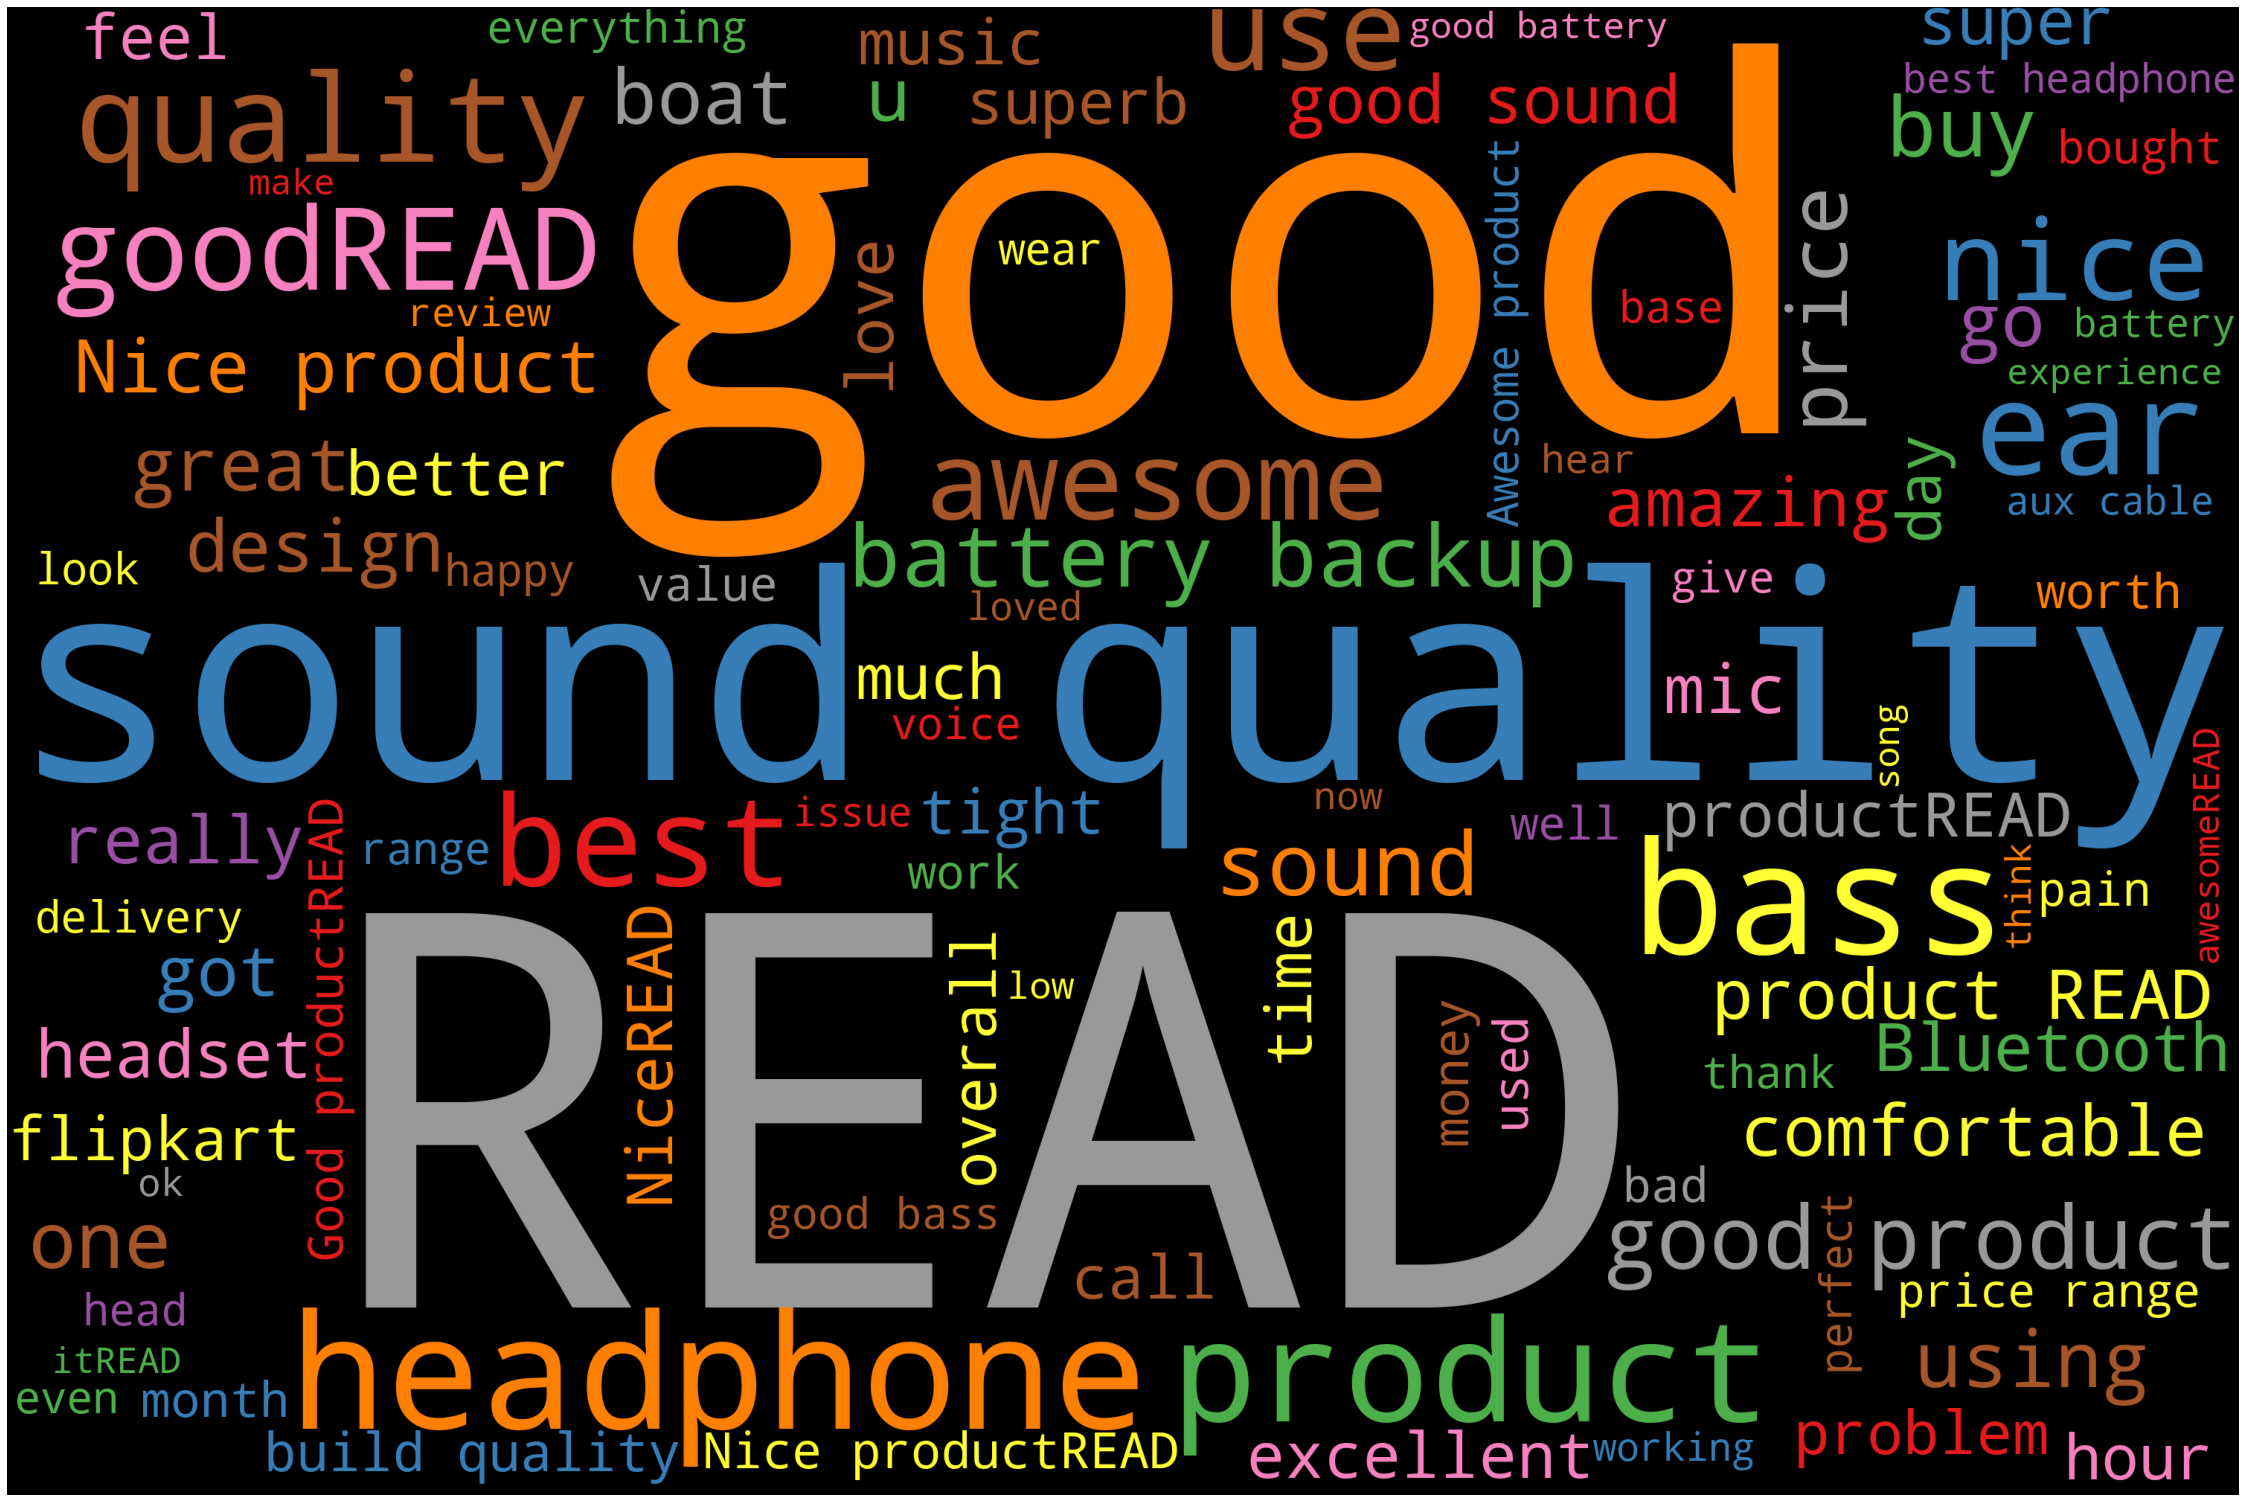

In [58]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(text)
# Plot
wordcloud = plot_cloud(wordcloud)